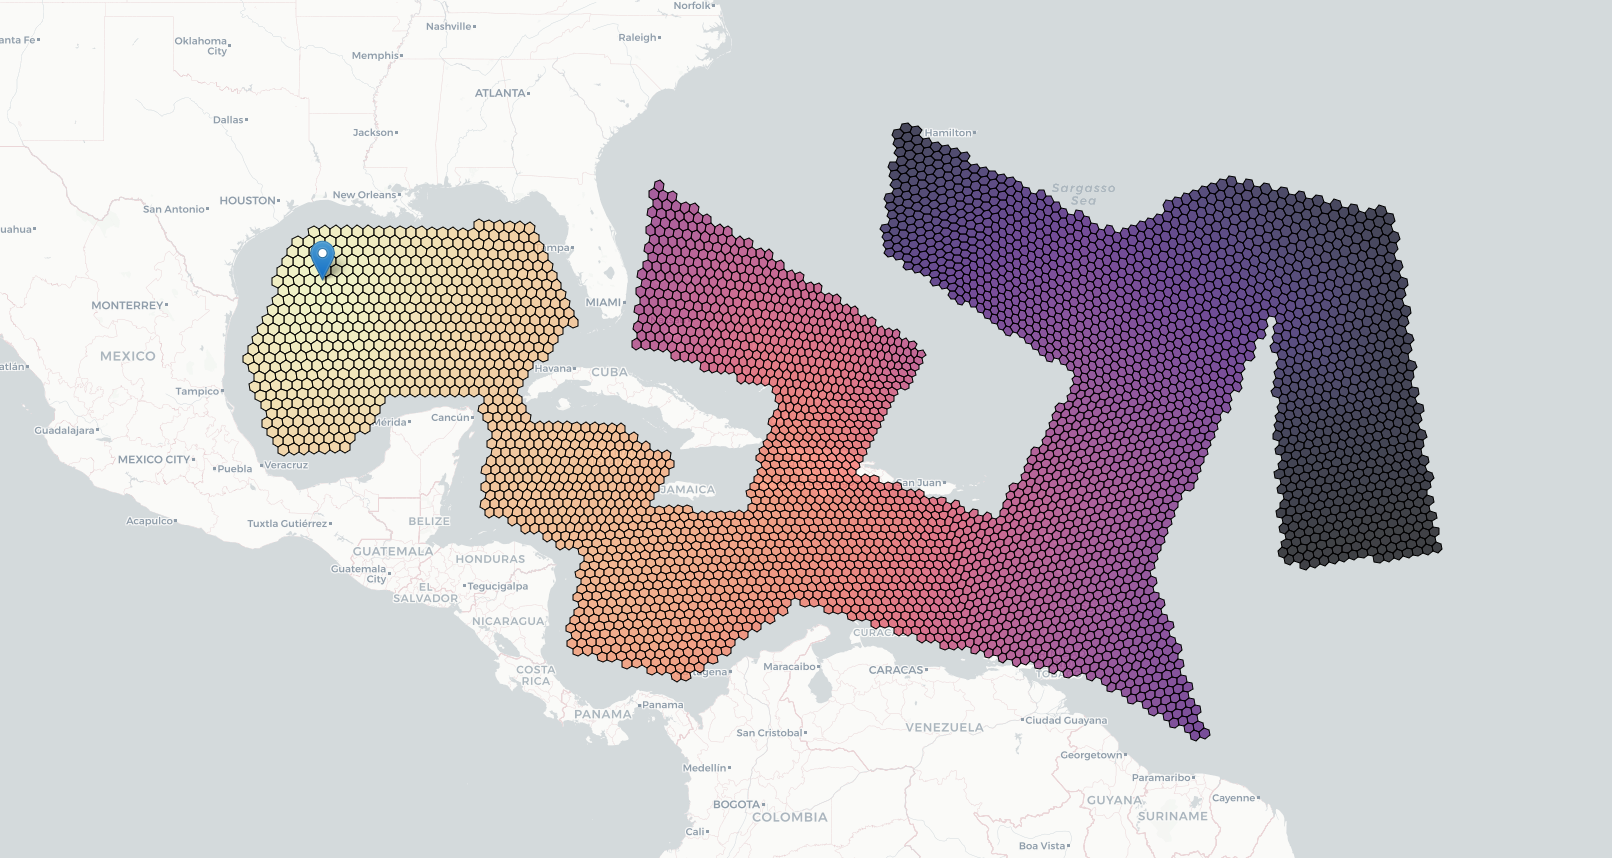

## Bredth-first Search
- Believe it or not, most of this came from ChatGPT
- https://www.redblobgames.com/pathfinding/a-star/introduction.html
- http://theory.stanford.edu/~amitp/GameProgramming/

In [1]:
import h3
from queue import Queue
import json
from pandas.io.json import json_normalize
import pandas as pd
import folium
import numpy as np

import matplotlib
import folium
from geojson import Feature, Point, FeatureCollection
import json
import geojson

In [34]:
def hexagons_dataframe_to_geojson(df_hex, file_output = None, hex_col='h3_3', column_name = "value"):
    """
    Produce the GeoJSON for a dataframe, constructing the geometry from the "hex_id" column
    and with a property matching the one in column_name
    """    
    list_features = []
    
    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": [h3.h3_to_geo_boundary(h=row[hex_col],geo_json=True)]}
            feature = Feature(geometry = geometry_for_row , id=row[hex_col], properties = {column_name : row[column_name]})
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row[hex_col]) 

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

def get_color(custom_cm, val, vmin, vmax):
    return matplotlib.colors.to_hex(custom_cm((val-vmin)/(vmax-vmin)))

def choropleth_map(df_aggreg, column_name = "value", hex_col='h3_3', border_color = 'black', fill_opacity = 0.7, color_map_name = "Blues", initial_map = None):
    """
    Creates choropleth maps given the aggregated data. initial_map can be an existing map to draw on top of.
    """    
    #colormap
    min_value = df_aggreg[column_name].min()
    max_value = df_aggreg[column_name].max()
    mean_value = df_aggreg[column_name].mean()
    print(f"Colour column min value {min_value}, max value {max_value}, mean value {mean_value}")
    print(f"Hexagon cell count: {df_aggreg[hex_col].nunique()}")
    
    # the name of the layer just needs to be unique, put something silly there for now:
    name_layer = "Choropleth " + str(df_aggreg)
    
    if initial_map is None:
        initial_map = folium.Map(location= [0, 0], zoom_start=2, tiles="cartodbpositron")

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg,hex_col=hex_col, column_name = column_name)

    # color_map_name 'Blues' for now, many more at https://matplotlib.org/stable/tutorials/colors/colormaps.html to choose from!
    custom_cm = matplotlib.cm.get_cmap(color_map_name)

    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': get_color(custom_cm, feature['properties'][column_name], vmin=min_value, vmax=max_value),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity 
        }, 
        name = name_layer
    ).add_to(initial_map)

    return initial_map

def sanity_test(points):
    """
    Plots the raw points on a map before converting to h3 bins, to make sure you didn't flip lat/lons etc
    """
    avg_lat = np.median([x[0] for x in points])
    avg_lon = np.median([x[1] for x in points])

    ## Gotta figure out how to plot polygons
    mapit = folium.Map( location=[avg_lat, avg_lon], zoom_start=resolution, tiles="cartodbpositron")
    for coord in points:
        folium.Marker( location=[ coord[0], coord[1] ] ).add_to( mapit )

    return mapit

In [4]:
## Atlantic Ocean
points = [[13.71410930, -55.21369198],
        [21.50942927, -37.27359648],
        [-0.17417542, -6.09614896],
        [-30.34686264, -5.83488543],
        [-32.35474993, -38.92826548],
        [-4.95780851, -31.61288673]]

## Sweet site to plot points and copy output
https://codepen.io/jhawes/pen/xxBVZY

In [284]:
## Michigan
points = [(45.74022,-87.27891),
 [42.85282,-88.084],
 [41.48659,-87.44147],
 [41.96383,-86.20568],
 [43.88194,-86.43468],
 [45.57723,-84.94518],
 [45.25569,-83.27641],
 [43.64478,-82.59555],
 [42.78264,-84.86426],
 [41.53111,-84.58415],
 [41.58308,-81.62337],
 [43.01576,-78.99218],
 [45.91043,-80.86],
 [46.28489,-83.8928]]

In [393]:
## Central America
points = [(28.50913,-94.6425),
 (23.53,-96.8456),
 (19.51555,-95.50535),
 (19.71323,-92.45124),
 (22.16635,-90.34195),
 (21.89699,-86.54072),
 (20.39477,-86.11776),
 (17.31437,-86.55928),
 (15.45769,-82.03394),
 (11.42477,-82.70692),
 (10.07826,-77.46235),
 (13.45293,-72.56967),
 (11.66706,-66.71026),
 (9.9444,-59.13702),
 (7.18725,-54.49346),
 (14.88219,-57.05693),
 (25.47001,-51.70842),
 (14.89453,-51.24857),
 (15.45197,-44.3727),
 (29.2383,-46.35338),
 (30.631,-53.83038),
 (28.53475,-58.58906),
 (32.70402,-68.10643),
 (27.87099,-68.85991),
 (22.83569,-60.25944),
 (17.01967,-63.87577),
 (18.96687,-70.07938),
 (23.8229,-66.97386),
 (30.44099,-78.85737),
 (24.13313,-79.84246),
 (22.22348,-73.37512),
 (17.07105,-74.94239),
 (17.58473,-79.18874),
 (19.43859,-78.01346),
 (20.88156,-80.67267),
 (20.95695,-84.19241),
 (22.33236,-84.99167),
 (25.01624,-82.30004),
 (28.89383,-84.38436)]

In [406]:
resolution = 4

In [285]:
len(df[f'h3_{resolution}'])

890

In [418]:
sanity_test(points)

In [397]:
geojson_ordered_points = [(b,a) for (a,b) in points]

geo_polygon = {"type":"Polygon",
           "coordinates":[
               geojson_ordered_points
           ]}

In [395]:
#texas
# start = (29.895859, -95.282392)
#ascension Island
# start = (-7.949386240827304, -14.354948560999532)
# Lake Michigan
# start = (42.07484782842364, -87.07979153863371)
# Gulf of Mexico
start = (26.626634118808596, -93.45342772804351)

In [407]:
df = pd.DataFrame(h3.polyfill_geojson(geo_polygon, res=resolution))
df = df.rename(columns={0:f"h3_{resolution}"})
## Add a generic value of 1 so we can test it
df['value']=1

print(f"{len(df[f'h3_{resolution}']):,}")

assert len(df[f'h3_{resolution}']) < 5000

4,552


In [408]:
start_hex = h3.geo_to_h3(lat=start[0], lng=start[1],resolution=resolution)

# Generate the initial set of hexagons using the h3.polyfill method
hexagons = set(df[f'h3_{resolution}'].tolist())

# Create a set to track which hexagons we have already visited
visited = set()

# Create a queue to hold the hexagons we need to visit next
queue = Queue()

# Add the starting hexagon to the queue
queue.put(start_hex)

# Track the current step we are on
current_step = 0

assert start_hex in hexagons, "Your start point is outside the polygon!"

In [411]:
outdict = {}

# Start the BFS algorithm
while not queue.empty():# and current_step < max_steps:
    # Get the next hexagon ID from the queue
    current_hex_id = queue.get()
    
    # Skip the hexagon if we've already visited it
    if current_hex_id in visited:
        continue
    
    # Add the hexagon to the visited set
    visited.add(current_hex_id)
    
    outdict[current_hex_id] = current_step
    
    # Get the neighboring hexagons
    neighbors = h3.k_ring(current_hex_id, 1)
    
    # Add the neighbors to the queue
    for neighbor in neighbors:
        if neighbor not in visited and neighbor in hexagons:
            queue.put(neighbor)
    
    # Increment the current step
    current_step += 1

df_out = pd.DataFrame([outdict]).T.reset_index().rename(columns={'index':f'h3_{resolution}', 0:'Step'})
assert len(df_out)>5, "Your stuff broke somewhere, dawg"

In [431]:
m = folium.Map( location=[avg_lat, avg_lon], zoom_start=resolution+1, tiles="cartodbpositron")

choropleth_map(df_aggreg=df_out, column_name = "Step", hex_col=f'h3_{resolution}', border_color = 'black', fill_opacity = 0.7, color_map_name = "magma_r", initial_map = m)
folium.Marker(start, popup='Start').add_to(m)
m

Colour column min value 0, max value 4551, mean value 2275.5
Hexagon cell count: 4552


In [432]:
m.save("magma_r.html")